In [1156]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [1157]:
df = pd.read_csv("adult.csv")

* Display the top few rows of the dataframe using head().

In [1158]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [1159]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [1160]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss','education-num':'educationnumber', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnumber', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'class'],
      dtype='object')

In [1161]:
cdf = df[['age','workclass','education','educationnumber','occupation','relationship','race','sex','class']]
cdf.head(5)

,age,workclass,education,educationnumber,occupation,relationship,race,sex,class
0,25,Private,11th,7,Machine-op-inspct,Own-child,Black,Male,<=50K
1,38,Private,HS-grad,9,Farming-fishing,Husband,White,Male,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Husband,White,Male,>50K
3,44,Private,Some-college,10,Machine-op-inspct,Husband,Black,Male,>50K
4,18,?,Some-college,10,?,Own-child,White,Female,<=50K


* Separate the variables into those that are categorical and those that are numeric and display them.

In [1162]:
#Separate the variables into those that are categorical and those that are numeric and display them.
cont = df.select_dtypes("number")
cont.head()

,age,fnlwgt,educationnumber,capital gain,capital loss,hours per week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [1163]:
catg = df.select_dtypes("object")
catg.head()

,workclass,education,marital,occupation,relationship,race,sex,country,class
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [1164]:
#For the variables that are categorical, report the unique values and their counts.
print(catg["workclass"].unique(),catg["workclass"].value_counts(ascending=True))
print(catg["education"].unique(),catg["education"].value_counts(ascending=True))
print(catg["marital"].unique(),catg["marital"].value_counts(ascending=True))
print(catg["occupation"].unique(),catg["occupation"].value_counts(ascending=True))
print(catg["relationship"].unique(),catg["relationship"].value_counts(ascending=True))
print(catg["race"].unique(),catg["race"].value_counts(ascending=True))
print(catg["sex"].unique(),catg["sex"].value_counts(ascending=True))
print(catg["country"].unique(),catg["country"].value_counts(ascending=True))
print(catg["class"].unique(),catg["class"].value_counts(ascending=True))


[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']  Never-worked           10
 Without-pay            21
 Federal-gov          1432
 Self-emp-inc         1695
 State-gov            1981
 ?                    2799
 Local-gov            3136
 Self-emp-not-inc     3862
 Private             33906
Name: workclass, dtype: int64
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']  Preschool          83
 1st-4th           247
 5th-6th           509
 Doctorate         594
 12th              657
 9th               756
 Prof-school       834
 7th-8th           955
 10th             1389
 Assoc-acdm       1601
 11th             1812
 Assoc-voc        2061
 Masters          2657
 Bachelors        8025
 Some-college    10878
 HS-grad         15784
Name: education, dtype: int64
[' Never-marrie

In [1165]:
catgworkclass = catg["workclass"].value_counts(normalize = True, ascending=True)
catgeducation = catg["education"].value_counts(normalize = True, ascending=True)
catgmarital = catg["marital"].value_counts(normalize = True, ascending=True)
catgoccupation = catg["occupation"].value_counts(normalize = True, ascending=True)
catgrelationship = catg["relationship"].value_counts(normalize = True, ascending=True)
catgrace = catg["race"].value_counts(normalize = True, ascending=True)
catgsex = catg["sex"].value_counts(normalize = True, ascending=True)
catgcountry = catg["country"].value_counts(normalize = True, ascending=True)
catgclass = catg["class"].value_counts(normalize = True, ascending=True)


* For each feature, also plot the normalized distribution of occurance of the values using a bar plot, after sorting them according to their occurance.

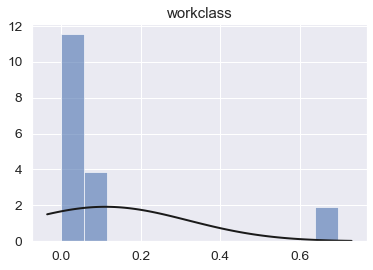

In [1166]:
data = (catgworkclass)
mu, std = norm.fit(data) 
plt.hist(catgworkclass, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "workclass".format(mu, std)
plt.title(title)
  
plt.show()


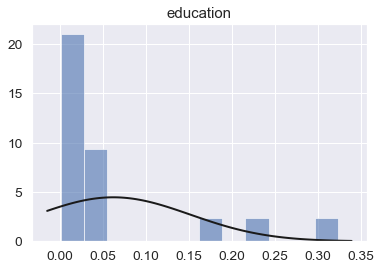

In [1167]:
data = (catgeducation)
mu, std = norm.fit(data) 
plt.hist(catgeducation, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "education".format(mu, std)
plt.title(title)
  
plt.show()

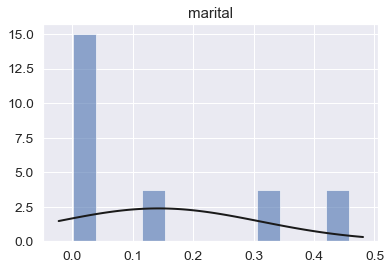

In [1168]:
data = (catgmarital)
mu, std = norm.fit(data) 
plt.hist(catgmarital, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "marital".format(mu, std)
plt.title(title)
  
plt.show()

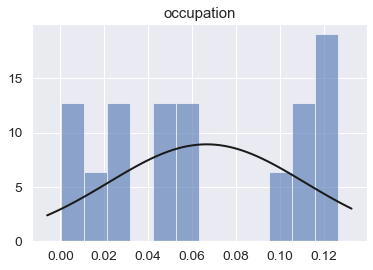

In [1169]:
data = (catgoccupation)
mu, std = norm.fit(data) 
plt.hist(catgoccupation, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "occupation".format(mu, std)
plt.title(title)
  
plt.show()

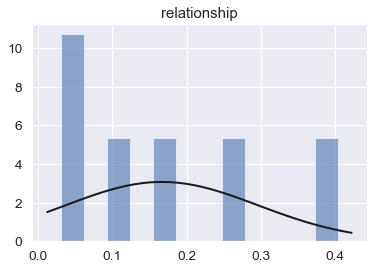

In [1170]:
data = (catgrelationship)
mu, std = norm.fit(data) 
plt.hist(catgrelationship, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "relationship".format(mu, std)
plt.title(title)
  
plt.show()

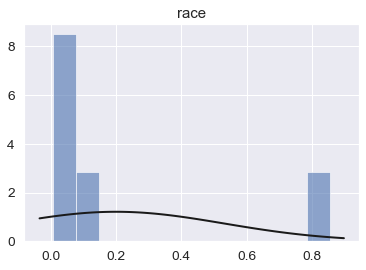

In [1171]:
data = (catgrace)
mu, std = norm.fit(data) 
plt.hist(catgrace, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "race".format(mu, std)
plt.title(title)
  
plt.show()

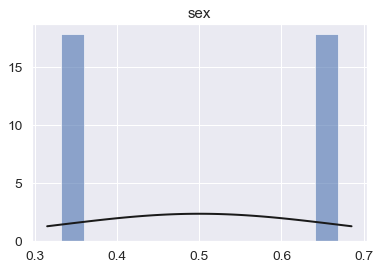

In [1172]:
data = (catgsex)
mu, std = norm.fit(data) 
plt.hist(catgsex, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "sex".format(mu, std)
plt.title(title)
  
plt.show()

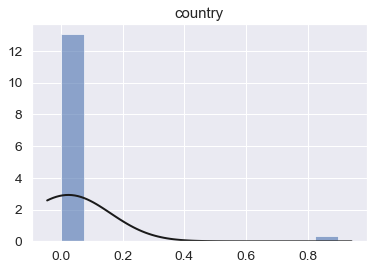

In [1173]:
data = (catgcountry)
mu, std = norm.fit(data) 
plt.hist(catgcountry, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "country".format(mu, std)
plt.title(title)
  
plt.show()

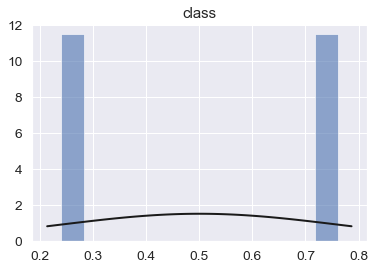

In [1174]:
data = (catgclass)
mu, std = norm.fit(data) 
plt.hist(catgclass, bins =12, density = True, alpha= 0.6, color='b') # plotting histogram 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "class".format(mu, std)
plt.title(title)
  
plt.show()

2.Our primary aim is to predict the class column using the other attributes. That is, we want to predict whether a person earns over 50K a year from heterogeneous data such as age, employment, education, family information, etc. This is a classification problem, and our objective in this question is to solve for it using linear regression.

* Describe how we can build a classifier using a linear model.?

We can build the linear model by converting the categorical variables into continuous variable. The 'income' feature will become binary with 0 and 1 since it only has two special values. Then, we can use the linear model to find the best fit line between the dependent variable and multiple independent variable. 

* Is the dataset balanced? Why or why not?


The dataset is not balanced because many variables are skewed toward one side. Fnlwgt, capital gain, capital loss are extremely skewed toward the left. Also, our 'class' variable has many more counts on '<=50’。 


In [1175]:
print(df.skew())

age                 0.557580
fnlwgt              1.438892
educationnumber    -0.316525
capital gain       11.894659
capital loss        4.569809
hours per week      0.238750
dtype: float64


In [1176]:
catg["class"].value_counts(ascending=True)

 >50K     11687
 <=50K    37155
Name: class, dtype: int64

* Write a function from scratch to split the dataset 80:20 into training and validation sets. Report the number of observations obtained in each set.

In [1177]:
#Write a function from scratch to split the dataset 80:20 into training and validation sets. Report the number of observations obtained in each set.

#rename class to income 
df.rename(columns={'class':'income'}, inplace=True)
df.columns

df_x = pd.DataFrame(df)
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass'],df['country']], 
                    columns = ['relationship','education','race','occupation','gender','marital','workclass','country'])
df_y = pd.DataFrame(df.income)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39073, 8)
(9769, 8)
(39073, 1)
(9769, 1)


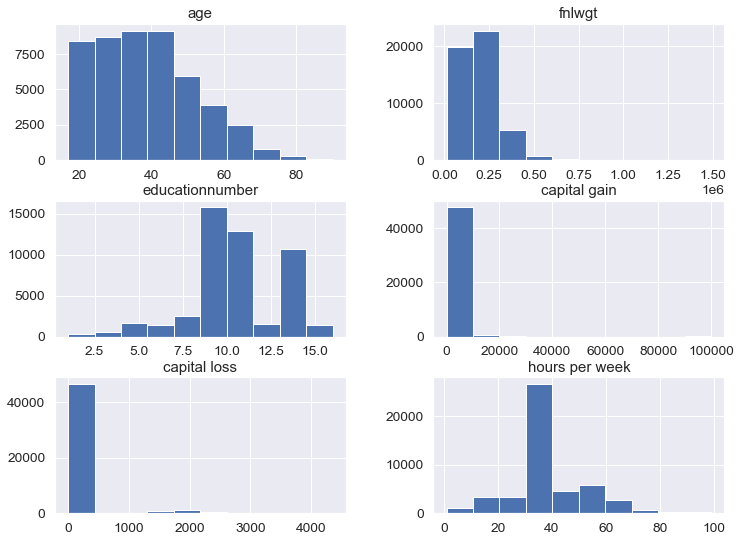

In [1178]:
# Plot histogram for each numeric variable of the dataset
df.hist(figsize=(12,9))
plt.show()

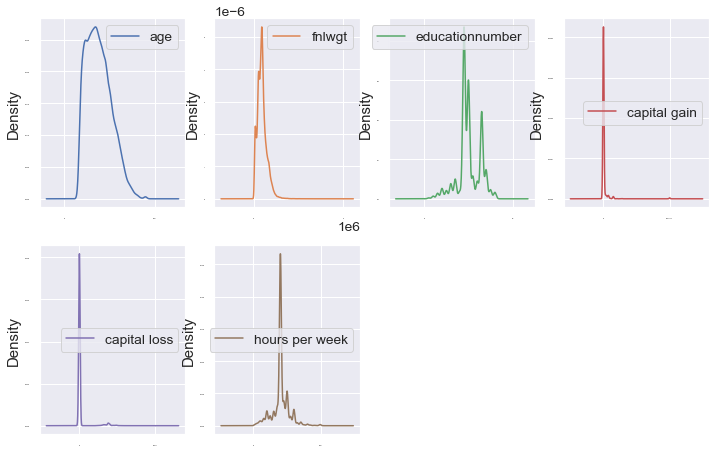

In [1179]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=2, figsize=(12,16))
plt.show()

In [1180]:
#search for missing values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educationnumber    0
marital            0
occupation         0
relationship       0
race               0
sex                0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [1181]:
#convert it to data frame
df = pd.DataFrame(df)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnumber', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [1182]:
#find the ' ?' variable in the data frame
df.isin([' ?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educationnumber       0
marital               0
occupation         2809
relationship          0
race                  0
sex                   0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [1183]:
# replace '?' to nan and then drop the columns 
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df.dropna(how='any',inplace=True)

In [1184]:
#now there is no more ' ?' in the data
df.isin([' ?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educationnumber    0
marital            0
occupation         0
relationship       0
race               0
sex                0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [1185]:
#checking the Special characters still exists 
df.workclass.value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [1186]:
#drop variabels that are not revelent. 
df.drop(['educationnumber','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss'], axis=1, inplace=True)

In [1187]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [1188]:
# Let's see how many unique categories we have in this property
income = set(df['income'])
print(income)

{' <=50K', ' >50K'}


In [1189]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [1190]:
#convert categorical values into numerical
df["income"] = df["income"].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [1191]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,0


In [1192]:
sex = set(df['sex'])
print(sex)
race = set(df['race'])
print(race)
Marital = set(df['marital'])
print(Marital)
workclass = set(df['workclass'])
print(workclass)
education = set(df['education'])
print(education)
occupation = set(df['occupation'])
print(occupation)
relationship = set(df['relationship'])
print(relationship)

{' Female', ' Male'}
{' Asian-Pac-Islander', ' Black', ' Other', ' Amer-Indian-Eskimo', ' White'}
{' Separated', ' Divorced', ' Widowed', ' Never-married', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent'}
{' Federal-gov', ' Without-pay', ' State-gov', ' Self-emp-inc', ' Self-emp-not-inc', ' Local-gov', ' Private'}
{' Assoc-voc', ' 9th', ' Masters', ' 1st-4th', ' HS-grad', ' 11th', ' Prof-school', ' 7th-8th', ' 12th', ' 10th', ' Preschool', ' Doctorate', ' Some-college', ' Bachelors', ' Assoc-acdm', ' 5th-6th'}
{' Transport-moving', ' Prof-specialty', ' Adm-clerical', ' Armed-Forces', ' Farming-fishing', ' Craft-repair', ' Sales', ' Priv-house-serv', ' Machine-op-inspct', ' Exec-managerial', ' Tech-support', ' Handlers-cleaners', ' Protective-serv', ' Other-service'}
{' Husband', ' Wife', ' Own-child', ' Not-in-family', ' Other-relative', ' Unmarried'}


In [1193]:
df['sex'] = df['sex'].map({' Male': 0, ' Female': 1}).astype(int)
df['race'] = df['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
df['marital'] = df['marital'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
df['workclass'] = df['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1, 
                                                             ' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4, 
                                                             ' Private': 5, ' Self-emp-not-inc': 6}).astype(int)
df['education'] = df['education'].map({' Some-college': 0, ' Preschool': 1, 
                                                        ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, 
                                                        ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,
                                                        ' 1st-4th': 8, ' Assoc-acdm': 9,
                                                        ' Doctorate': 10, ' 11th': 11,
                                                        ' Bachelors': 12, ' 10th': 13,
                                                        ' Assoc-voc': 14,
                                                        ' 9th': 15}).astype(int)
df['occupation'] = df['occupation'].map({' Farming-fishing': 0, ' Tech-support': 1, 
                                         ' Adm-clerical': 2,' Handlers-cleaners': 3, 
                                         ' Prof-specialty': 4, ' Machine-op-inspct': 5, 
                                         ' Exec-managerial': 6, 
                                         ' Priv-house-serv': 7, 
                                         ' Craft-repair': 8, 
                                         ' Sales': 9, 
                                         ' Transport-moving': 10, 
                                         ' Armed-Forces': 11, 
                                         ' Other-service': 12, 
                                         ' Protective-serv': 13}).astype(int)
df['relationship'] = df['relationship'].map({' Not-in-family': 0, ' Wife': 1, 
                                                             ' Other-relative': 2, 
                                                             ' Unmarried': 3, 
                                                             ' Husband': 4, 
                                                             ' Own-child': 5}).astype(int)
df['country'] = df['country'].map({' United-States':0, ' Peru':1,' Guatemala':2,' Mexico':3,' Dominican-Republic':4, ' Ireland':5, ' Germany':6,' Philippines':7, ' Thailand':8,' Haiti':9, ' El-Salvador':10, ' Puerto-Rico':11, ' Vietnam':12, ' South':13, ' Columbia':14,
 ' Japan':15, ' India':16, ' Cambodia':17, ' Poland':18, ' Laos':19, ' England':20, ' Cuba':21,
 ' Taiwan':22, ' Italy':23, ' Canada':24, ' Portugal':25, ' China':26, ' Nicaragua':27,
 ' Honduras':28, ' Iran':29, ' Scotland':30, ' Jamaica':31, ' Ecuador':32, ' Yugoslavia':33,
 ' Hungary':34, ' Hong':35, ' Greece':36, ' Trinadad&Tobago':37,
 ' Outlying-US(Guam-USVI-etc)':38, ' France':39, ' Holand-Netherlands':40}).astype(int)

In [1194]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,country,income
0,5,11,5,5,5,0,0,0,0
1,5,3,2,0,4,3,0,0,0
2,4,9,2,13,4,3,0,0,1
3,5,0,2,5,4,0,0,0,1
5,5,13,5,12,0,3,0,0,0


In [1195]:
df.describe()

,workclass,education,marital,occupation,relationship,race,sex,country,income
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,4.567069,5.563354,3.228296,6.315024,2.807196,2.663704,0.324952,1.180509,0.247844
std,1.358400,4.881108,1.439853,3.486367,1.872285,0.927929,0.468362,4.878719,0.431766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,2.000000,6.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,5.000000,12.000000,5.000000,9.000000,4.000000,3.000000,1.000000,0.000000,0.000000
max,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


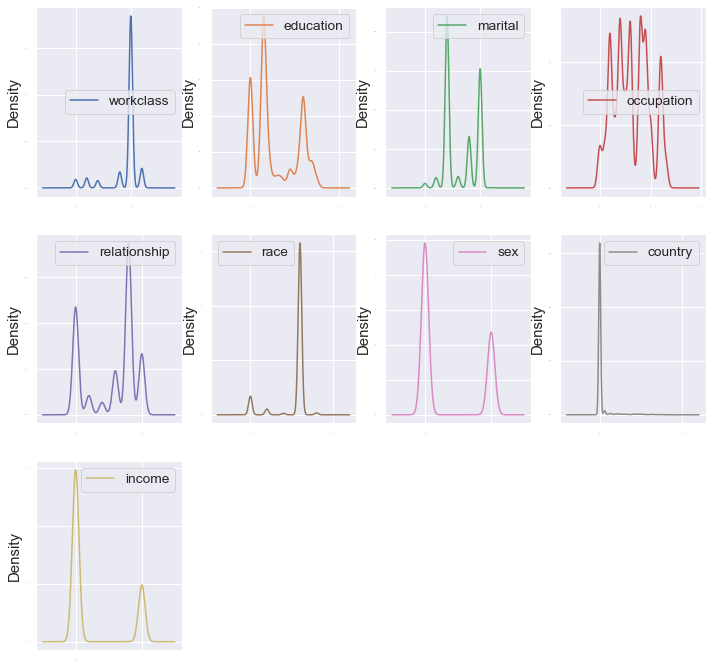

In [1196]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

3. Perform basic exploratory analysis by computing and visualizing correlations between features.
* Draw the plot of correlations between every pair of features.

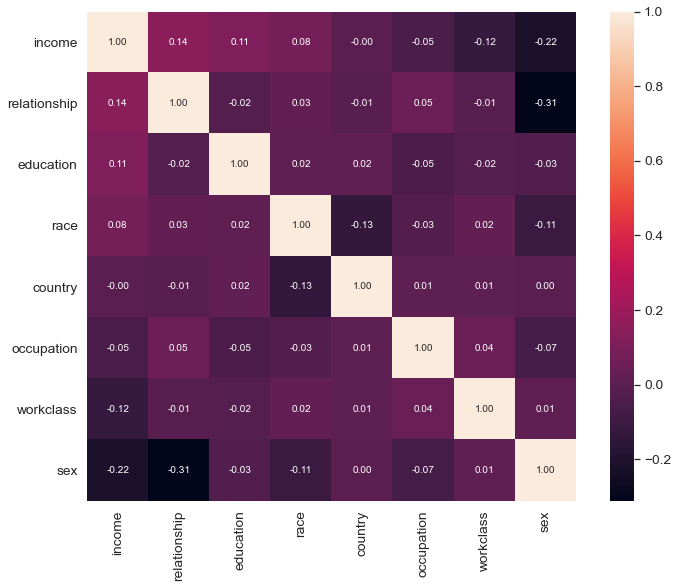

In [1197]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* Which features are highly correlated one another?

From the plot above, we can see that there is a correlation between relationship, education, and race. 

<AxesSubplot:xlabel='education'>

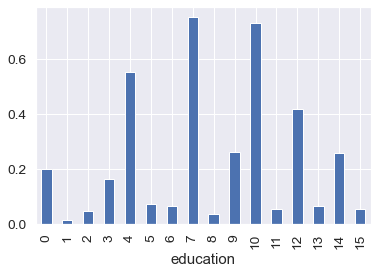

In [1198]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').income.mean().plot(kind='bar')


<AxesSubplot:xlabel='occupation'>

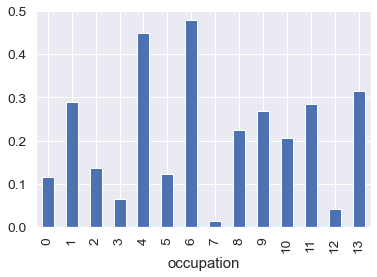

In [1199]:
#plotting a bar graph for occupation against Income to see the co-relation between these columns 
df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

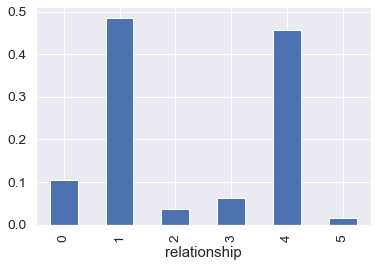

In [1200]:
#plotting a bar graph for relationship against Income to see the co-relation between these columns 
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

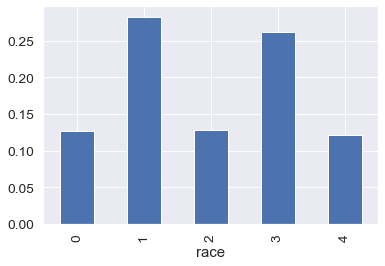

In [1201]:
#plotting a bar graph for race against Income to see the co-relation between these columns 
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

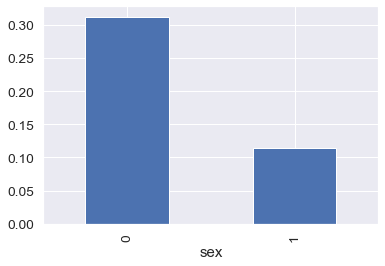

In [1202]:
#plotting a bar graph for sex against Income to see the co-relation between these columns 
df.groupby('sex').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

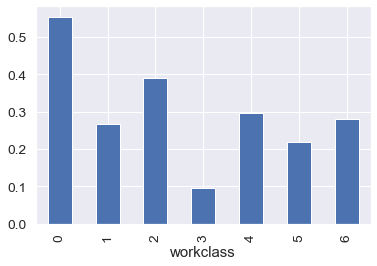

In [1203]:
#plotting a bar graph for workclass against Income to see the co-relation between these columns 
df.groupby('workclass').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital'>

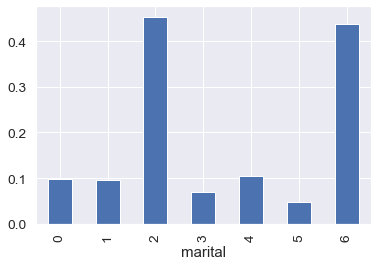

In [1204]:
#plotting a bar graph for marital against Income to see the co-relation between these columns 
df.groupby('marital').income.mean().plot(kind='bar')

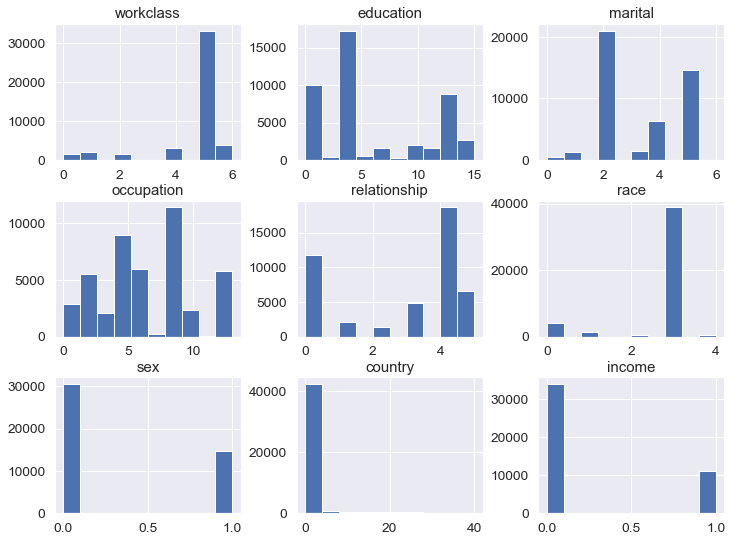

In [1205]:
# Plot histogram for each numeric variable/attribute of the dataset
df.hist(figsize=(12,9))
plt.show()

* Is the data matrix tall or wide? 

The data matrix is tall since we have more columns than rows.

4. Linear regression

In [1212]:
df_x = pd.DataFrame(df)
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass'],df['country']], 
                    columns = ['relationship','education','race','occupation','gender','marital','workclass','country'])
df_y = pd.DataFrame(df.income)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36177, 8)
(9045, 8)
(36177, 1)
(9045, 1)


In [1213]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [1214]:
# Store dataframe values into a numpy array
array = df.values
X = array[:, 0:6]
Y = array[:,7]

In [1215]:
#df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']
reg.predict([[5,11,0,6,0,5,5,2]])

array([0])

In [1216]:
#confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6270,  529],
       [1596,  650]], dtype=int64)

In [1217]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7650635710337202
